In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import pydicom

In [13]:
!ls

config.py          datasets.py        iaaa_project.ipynb
data               docks              resnet_50.ipynb
data_summary.ipynb iaaa-mri-train.zip train.csv


In [14]:
!pwd

/Users/anazarnia/data_science/iaaa


In [1]:
# checkout number of folders and files (shell commands)

!echo "Number of files:"
!find /Users/anazarnia/data_science/iaaa/data -type f | wc -l

!echo "Number of directories:"
!find /Users/anazarnia/data_science/iaaa/data -type d | wc -l

Number of files:
   52322
Number of directories:
    3133


In [4]:
# train.csv

df = pd.read_csv("train.csv")

print(len(df))
print(df.head(5))

3132
                                   SeriesInstanceUID  prediction
0  1.3.46.670589.11.10042.5.0.6048.20240307143704...           0
1  1.3.46.670589.11.10042.5.0.6048.20240307143746...           0
2  1.3.46.670589.11.10042.5.0.6048.20240307143846...           0
3  1.3.46.670589.11.10042.5.0.4776.20240217030800...           0
4  1.3.46.670589.11.10042.5.0.4776.20240217030846...           0


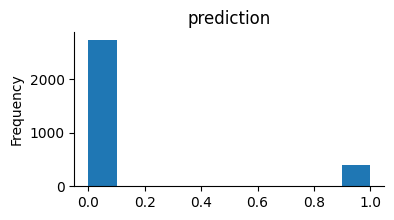

In [6]:
# dataframe analytic

plt.figure(figsize=(4,2))
df['prediction'].plot(kind='hist', bins=10, title='prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
dicom_file = pydicom.dcmread('/Users/anazarnia/data_science/iaaa/data/1.3.46.670589.11.10042.5.0.920.2024010112350356851/1.3.46.670589.11.10042.5.0.920.2024010112361560880.dcm')

print(dicom_file)   # DICOM metadata

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.33333831181563288238424454944873398614
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 5.1.1'
(0002, 0016) Source Application Entity Title     AE: 'ACHIVA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_IR', 'M', 'IR']
(0008, 0012) Instance Creation Date              DA: '20240101'
(0008, 0013) Instance Creation Time              TM: '125333'
(0008, 0014) Instance Creator U

In [10]:
dir(dicom_file)

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionDuration',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmittingDiagnosesDescription',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CodeMeaning',
 'CodeValue',
 'CodingSchemeDesignator',
 'Columns',
 'CommentsOnThePerformedProcedureStep',
 'ContentDate',
 'ContentTime',
 'DeidentificationMethodCodeSequence',
 'DeviceSerialNumber',
 'DiffusionBValue',
 'DiffusionGradientOrientation',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FilmConsumptionSequence',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HeartRate',
 'HighBit',
 'HighRRValue',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceCreatorUID',
 'InstanceNumber',
 'InstitutionName',
 'InstitutionalDepartmentName',
 'IntervalsAcquired',
 'IntervalsRejected',
 'InversionTime',
 'LossyImageCompression',

In [11]:
# check the shape of the image
dicom_file.pixel_array.shape

(288, 288)

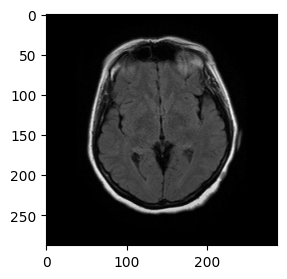

In [12]:
# extacting and display the image data

image_data = dicom_file.pixel_array

plt.figure(figsize=(3,3))
plt.imshow(image_data, cmap=plt.cm.gray)
plt.show()